In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('./Electric_Vehicle_Population_Data.csv')
print(data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
data = data.dropna()

##Analyzing the sale of EV year wise:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

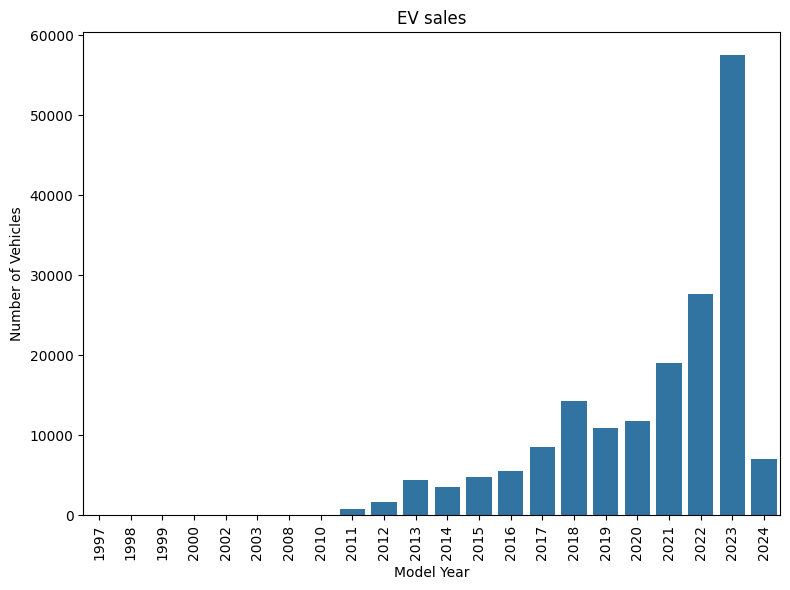

In [38]:
plt.figure(figsize=(8, 6))
ev_adoption_by_year = data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values)
plt.title('EV sales')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Top Cities in EV sales:

In [11]:
ev_county_distribution = data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

In [12]:
top_counties_data = data[data['County'].isin(top_counties)]

In [13]:
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [14]:
top_cities = ev_city_distribution_top_counties.head(10)

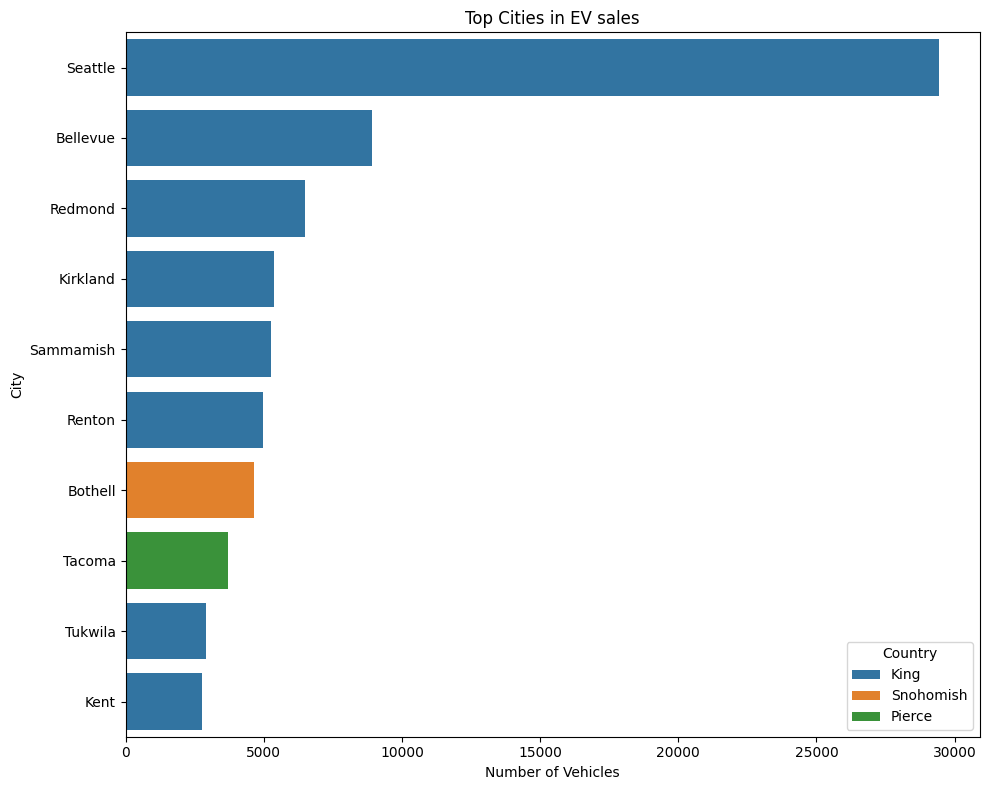

In [39]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities)
plt.title('Top Cities in EV sales')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

##Analysing type of EV sold:

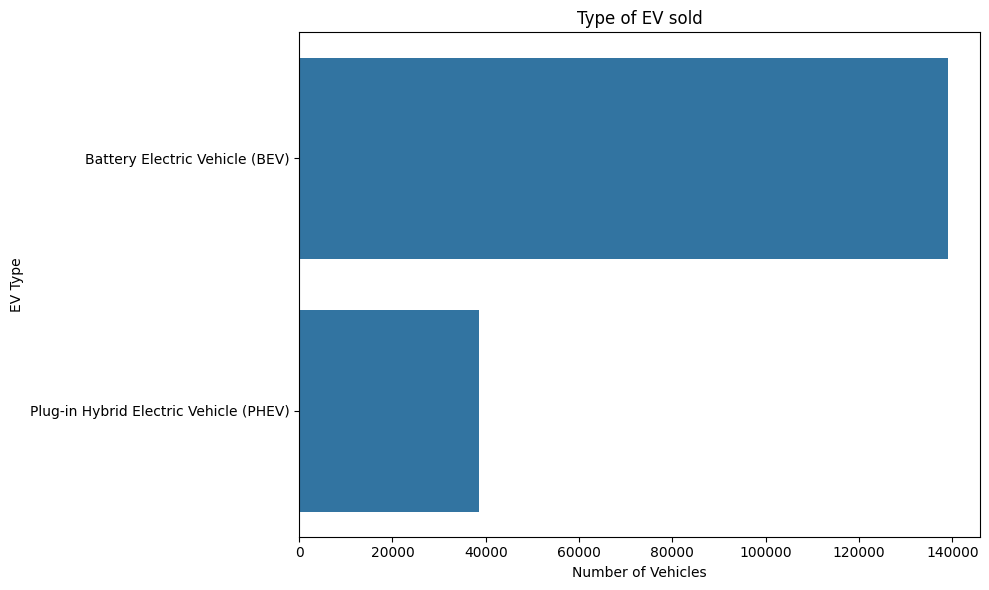

In [40]:
ev_type_distribution = data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index)
plt.title('Type of EV sold')
plt.xlabel('Number of Vehicles')
plt.ylabel('EV Type')
plt.tight_layout()
plt.show()

##Top EV manufacturing companies:

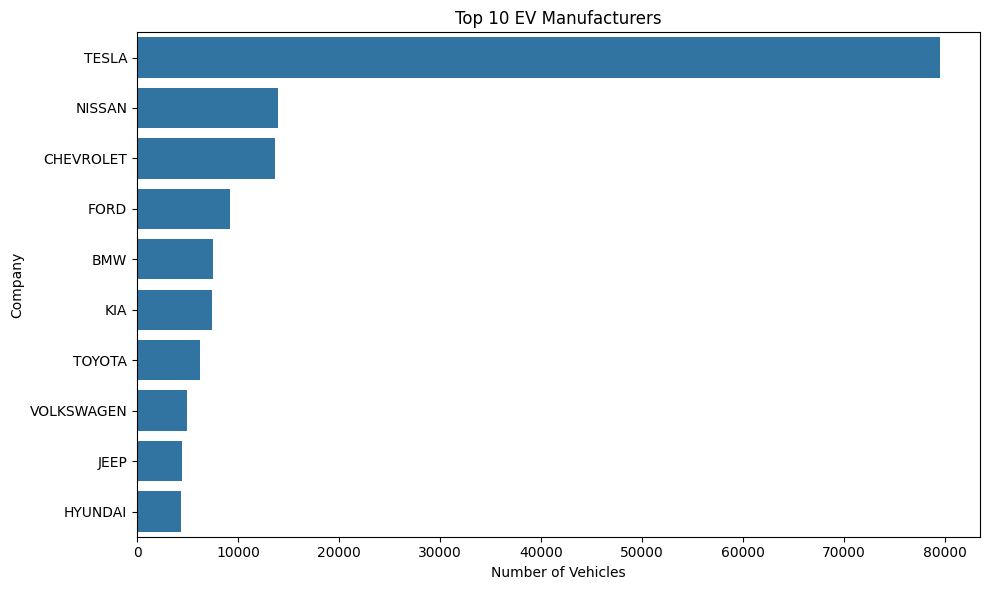

In [41]:
ev_make_distribution = data['Make'].value_counts().head(10)  

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index)
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

##Market size analysis of EV:

In [22]:
from scipy.optimize import curve_fit
import numpy as np

In [25]:
ev_registration_counts = data['Model Year'].value_counts().sort_index()

In [26]:
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

In [27]:
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [28]:
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [29]:
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [32]:
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

In [33]:
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


In [30]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

In [34]:
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

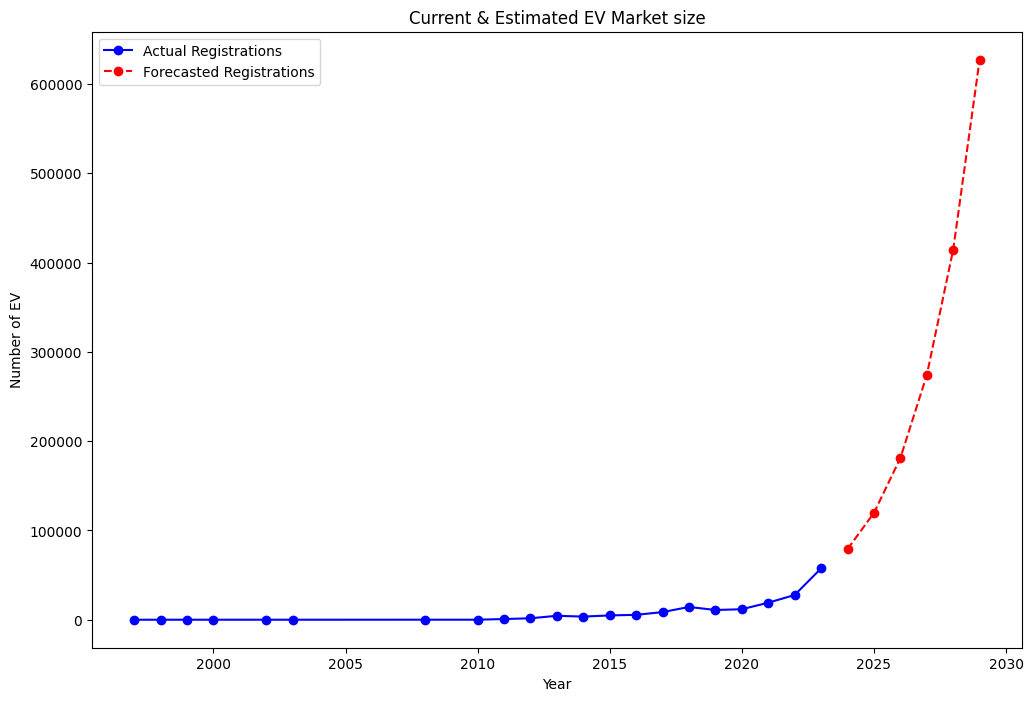

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market size')
plt.xlabel('Year')
plt.ylabel('Number of EV')
plt.legend()

plt.show()